<a href="https://colab.research.google.com/github/VaggelisApostolou/auth-dws-ml-2025/blob/main/ML_Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import yfinance as yf
import holidays
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import BayesianRidge

# **Ερωτήματα**

## *Ερώτημα 1*

In [ ]:
ticker_symbol = 'DX-Y.NYB'
ticker = yf.Ticker(ticker_symbol)
df = ticker.history(period='5y').reset_index(drop=False)
df = df.drop(columns=['Volume', 'Dividends', 'Stock Splits'])
print(df)

                          Date        Open        High         Low       Close
0    2020-11-05 00:00:00-05:00   93.339996   93.550003   92.489998   92.529999
1    2020-11-06 00:00:00-05:00   92.570000   92.820000   92.180000   92.230003
2    2020-11-09 00:00:00-05:00   92.239998   92.959999   92.129997   92.730003
3    2020-11-10 00:00:00-05:00   92.760002   92.970001   92.599998   92.750000
4    2020-11-11 00:00:00-05:00   92.699997   93.209999   92.610001   93.040001
...                        ...         ...         ...         ...         ...
1253 2025-10-30 00:00:00-04:00   99.139999   99.720001   98.919998   99.529999
1254 2025-10-31 00:00:00-04:00   99.489998   99.839996   99.419998   99.800003
1255 2025-11-03 00:00:00-05:00   99.750000   99.989998   99.709999   99.870003
1256 2025-11-04 00:00:00-05:00   99.980003  100.260002   99.739998  100.220001
1257 2025-11-05 00:00:00-05:00  100.108002  100.108002  100.033997  100.033997

[1258 rows x 5 columns]


In [ ]:
fig = px.line(df, x='Date', y=['Open', 'High', 'Low', 'Close'])
print(fig.show())

None


## *Ερώτημα 2*

Με βάση το lineplot του ερωτήματος 1 φαίνεται ξεκάθαρα πως οι χρονοσειρές είναι μη στατικές, καθώς εμφανίζονται ξεκάθαρες τάσεις, με περιόδους ανόδου και πτώσης, ενώ επίσης και η διακύμανση μεταβάλλεται.

## *Ερώτημα 3*

Στην περίπτωση που εκπαιδεύαμε έναν Regressor σε μη στατικές χρονοσειρές, θα εμφανιζόταν αρκετά προβλήματα. Αρχικά, το μοντέλο θα επηρεαζόταν από παροδικές τάσεις (πχ σε φάση ανόδου από τον Ιούλιο του 2021 μέχρι τον Νοέμβριο του 2021, θα μπορούσε να προβλέπει πως και η αρχή του 2022 θα ήταν ανοδική). Επίσης, λόγω των συνεχών αυξομειώσεων το μοντέλο που εκπαιδεύεται σε περίοδο χαμηλής διακύμανσης δεν μπορεί να προβλέψει σωστά σε περίοδο μεγάλης διακύμανσης, καθώς τα σφάλματά του είναι πολλά. Τέλος, το μοντέλο του Regressot υποθέτει σταθερή σχέση μεταξύ features (σε αυτή την περίπτωση Open, High, Low, Close), κάτι που εδώ δεν ισχύει, με αποτέλεσμα αστάθειες και bias στο output.

## *Ερώτημα 4*


In [ ]:
fig2 = fig.update_xaxes(range=['2025-05-01', '2025-08-31'])
print(fig2.show())

None


Όπως φαίνεται στο παραπάνω διάγραμμα, το δολάριο κατά τον Ιούνιου του 2025 έχει σταθερή τάση με μια ελαφριά άνοδο να εμφανίζεται τέλη του μήνα και αρχές Ιουλίου. Μια πιθανή αιτία για αυτό θα μπορούσε να είναι ο πόλεμος ανάμεσα σε Ιράν και Ισραήλ που ξεκίνησε στις 13 Ιουνιού 2025 και τελείωσε στις 25 Ιουνίου 2025, καθώς σε τέτοιου τύπου γεωπολιτικές κρίσεις οι επενδυτές στρέφονται σε σε πιο ασφαλή περιουσιακά στοιχεία, όπως ο χρυσός, τα κρατικά ομόλογα των ΗΠΑ, αλλά και το δολάριο.

## *Ερώτημα 5*

Έχοντας ως πληροφορία τα σημερινά open, high, low, close θα μπορούσε να γίνει μια προσεγγιστική συνάρτηση. Ωστόσο, η ακρίβεια της προσέγγισης δεν  θα ήταν πολύ μεγάλη καθώς τέτοιες τιμές επηρεάζονται από πολλούς μη μετρίσιμους παράγοντες, όπως για παράδειγμα μια γεωπολιτική κρίση όπως στο ερώτημα 4.

## *Ερώτημα 6*

Δεν έχει νόημα να γίνει τυχαίος (και όχι χρονικός) διαχωρισμός σε train-test, καθώς το μοντέλο σε αυτή την περίπτωση θα δει στο train set μελλοντικές τιμές που θα κληθέι να αργότερα να προσεγγίσει. Αυτό θα έχει καταστροφικά αποτελέσματα για το πραγματικό μέλλον.

## *Ερώτημα 7*

In [ ]:
train_df = df[df['Date'] < '2024-01-01 00:00:00']
test_df = df[(df['Date'] >= '2024-01-01 00:00:00') & (df['Date'] < '2025-01-01 00:00:00')]
train_df = train_df.drop(columns=['Date'])
test_df = test_df.drop(columns=['Date'])
print(train_df.shape)
print(test_df.shape)

(792, 4)
(252, 4)


## *Ερώτημα 8*

In [ ]:
def create_timeframes(data_df, n):
    timeframes = []
    timeframe_targets = []
    data_array = data_df.to_numpy()
    for i in range(data_df.shape[0] - n):
        end = i + n
        timeframes.append(data_array[i: end])
        timeframe_targets.append(data_array[end][3])

    return np.array(timeframes), np.array(timeframe_targets)


inputs, targets = create_timeframes(train_df, 5)

## *Ερώτημα 9*

Για πρόβλεψη της επόμενης μέρας προτιμότερο είναι το μέγεθος του timeframe να είναι μικρό, καθώς οι πιο πρόσφατες τιμές επηρεάζουν άμεση την βραχυπρόθεσμη τιμή.

## *Ερώτημα 10*

In [ ]:
x_train, y_train = create_timeframes(train_df, 5)
x_test , y_test = create_timeframes(test_df, 5)
n = 5
num_features = train_df.shape[1]

x_train_flat = x_train.reshape((x_train.shape[0], n*num_features))
x_test_flat = x_test.reshape((x_test.shape[0], n*num_features))
print(x_train_flat.shape, x_test_flat.shape)
print(y_train.shape, y_test.shape)


(787, 20) (247, 20)
(787,) (247,)


## *Ερώτημα 11*

In [ ]:
train_errors = []
test_errors = []

### Linear Regression

In [ ]:
model = LinearRegression()
model.fit(x_train_flat, y_train)
mae_train = mean_absolute_error(y_train, model.predict(x_train_flat))
mae_test = mean_absolute_error(y_test, model.predict(x_test_flat))
train_errors.append(mae_train)
test_errors.append(mae_test)
print(f'The MAE in train set of Linear Regression is: {mae_train:.2f}')
print(f'The MAE in test set of Linear Regression is: {mae_test:.2f}')

The MAE in train set of Linear Regression is: 0.35
The MAE in test set of Linear Regression is: 0.28


### Random Forest Regressor

In [ ]:
model = RandomForestRegressor()
model.fit(x_train_flat, y_train)
mae_train = mean_absolute_error(y_train, model.predict(x_train_flat))
mae_test = mean_absolute_error(y_test, model.predict(x_test_flat))
train_errors.append(mae_train)
test_errors.append(mae_test)
print(f'The MAE in train set of Random Forest Regressor is: {mae_train:.2f}')
print(f'The MAE in test set of Random Forest Regressor is: {mae_test:.2f}')

The MAE in train set of Random Forest Regressor is: 0.15
The MAE in test set of Random Forest Regressor is: 0.32


### Bagging Regressor

In [ ]:
model = BaggingRegressor(estimator=LinearRegression())
model.fit(x_train_flat, y_train)
mae_train = mean_absolute_error(y_train, model.predict(x_train_flat))
mae_test = mean_absolute_error(y_test, model.predict(x_test_flat))
train_errors.append(mae_train)
test_errors.append(mae_test)
print(f'The MAE in train set of Bagging Regressor is: {mae_train:.2f}')
print(f'The MAE in test set of Bagging Regressor is: {mae_test:.2f}')

The MAE in train set of Bagging Regressor is: 0.35
The MAE in test set of Bagging Regressor is: 0.28


### Blr

**Για το συγκεκριμένο υποερώτημα δεν μπόρεσα να βρω τι είναι το Blr, καθώς δεν υπήρχε και link σε αντίθεση με τα υπόλοιπα. Έτσι, μετά από αναζήτηση υπέθεσα πως η εκφώνηση μπορεί να εννοεί το Bayesian Linear Regressor και χρησιμοποίησα αυτό.**

In [ ]:
model = BayesianRidge()
model.fit(x_train_flat, y_train)
mae_train = mean_absolute_error(y_train, model.predict(x_train_flat))
mae_test = mean_absolute_error(y_test, model.predict(x_test_flat))
train_errors.append(mae_train)
test_errors.append(mae_test)
print(f'The MAE in train set of Bayesian Ridge Regression is: {mae_train:.2f}')
print(f'The MAE in test set of Bayesian Ridge Regression is: {mae_test:.2f}')

The MAE in train set of Bayesian Ridge Regression is: 0.35
The MAE in test set of Bayesian Ridge Regression is: 0.28


### Stacking Regressor

In [ ]:
model = StackingRegressor(estimators=[('lr', LinearRegression()), ('dtr', DecisionTreeRegressor())])
model.fit(x_train_flat, y_train)
mae_train = mean_absolute_error(y_train, model.predict(x_train_flat))
mae_test = mean_absolute_error(y_test, model.predict(x_test_flat))
train_errors.append(mae_train)
test_errors.append(mae_test)
print(f'The MAE in train set of Stacking Regressor is: {mae_train:.2f}')
print(f'The MAE in test set of Stacking Regressor is: {mae_test:.2f}')

The MAE in train set of Stacking Regressor is: 0.36
The MAE in test set of Stacking Regressor is: 0.29


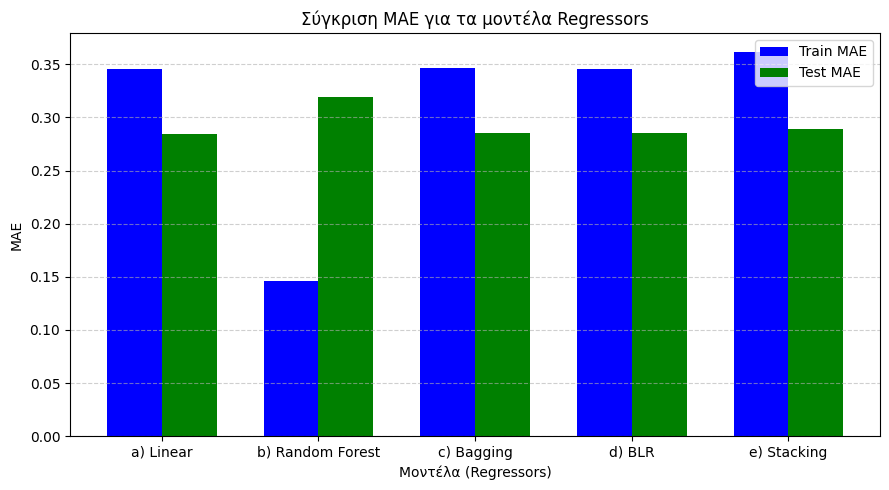

In [ ]:
models = ['a) Linear', 'b) Random Forest', 'c) Bagging', 'd) BLR', 'e) Stacking']
x = np.arange(len(models))
width = 0.35
plt.figure(figsize=(9,5))
plt.bar(x - width/2, train_errors, width, label='Train MAE', color='blue')
plt.bar(x + width/2, test_errors, width, label='Test MAE', color='green')
plt.xlabel('Μοντέλα (Regressors)')
plt.ylabel('MAE')
plt.title('Σύγκριση MAE για τα μοντέλα Regressors')
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

a) Linear Regression: Υπολογίζει γραμμική σχέση ανάμεσα στις μεταβλητές ελαχιστοποιώντας το τετράγωνο του σφάλματος.

b) Random Forest Regressor: Συνδυάζει δέντρα απόφασης και παίρνει τον μέσο όρο των προβλέψεών τους.

c) Bagging Regressor: Εκπαιδεύει πολλά μοντέλα ίδιου τύπου (στην περίπτωσή μας Linear Regressors) σε διαφορετικά δείγματα και συνδυάζει τα αποτελέσματά τους.

d) BLR (**Bayesian Linear Regression**): Εφαρμόζει γραμμική παλινδρόμηση με πιθανοκρατική εκτίμηση των συντελεστών, ώστε να αντιμετωπίζει καλύτερα αβεβαιότητα και overfitting.

e) Stacking Regressor: Συνδυάζει διαφορετικά μοντέλα (στην περίπτωσή μας Linear Regressor και Decision Tree Regressor) ώστε ένα μετα-μοντέλο να μάθει από τις προβλέψεις τους.